<a href="https://colab.research.google.com/github/suucong/AI_Practice/blob/main/linearRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 넘파이와 파이토치를 불러온다
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있다.(ex. Linear, Covolution, RNN 등등)
import torch.nn as nn

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있다.(ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화하는 함수들이 들어가 있다.(ex.uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력
import matplotlib.pyplot as plt

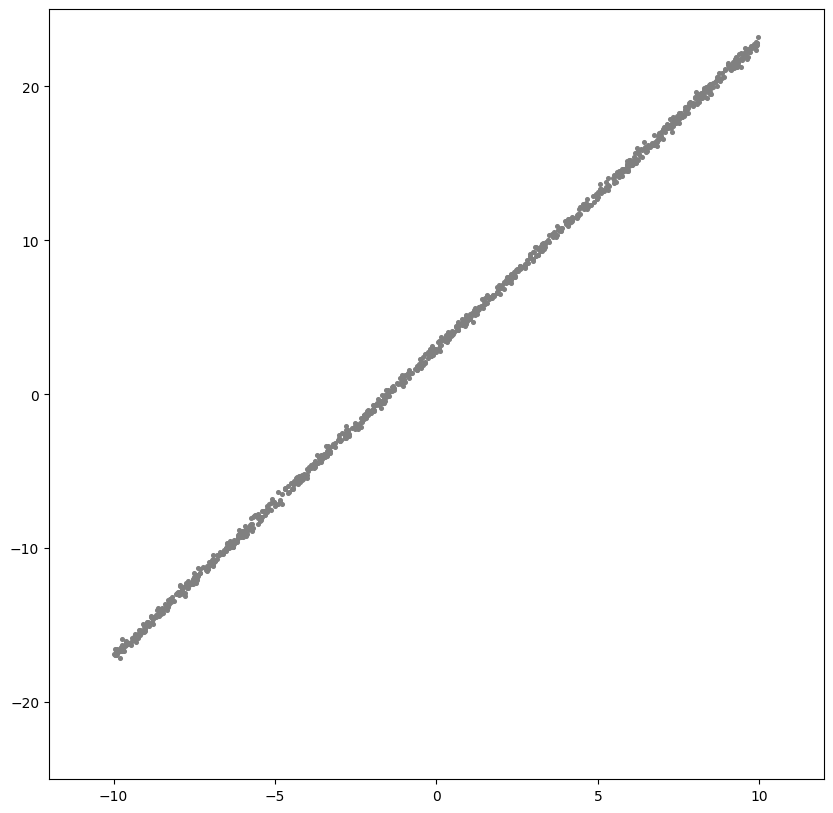

In [3]:
# 데이터의 개수는 1000개, 학습 횟수는 500회로 지정해준다.
# 이는 임의로 지정한 수치
num_data = 1000
num_epoch = 500

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어준다.
# 이때 평균은 디폴트로 0, 편차는 0.2로 임의로 지정
noise = init.normal_(torch.FloatTensor(num_data, 1), std=0.2)

# x는 -10에서 10으로 uniform 하게 생성
# 이렇게 되면 x는 1000x1형태를 가지고 -10에서 10 사이의 값들을 uniform 하게 갖게 된다
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)

# 연산 그래프를 정의
y = 2*x+3

# y에 노이즈를 더해 y_noise 값을 만들어준다
# 학습때 y_noise를 목표값으로 사용
# 이유: 실제 데이터를 사용할 때 여러 측정 과정에서 노이즈가 추가되는 경우가 많기 때문
y_noise = y+noise

# figure의 크기를 지정
plt.figure(figsize=(10,10))

# x축에는 x를 사용하고 y축에는 y_noise를 사용해 scatter plot 해줌
# 이 때 점의 크기는 7, 점의 색상은 회색
plt.scatter(x.numpy(), y_noise.numpy(), s=7, c="gray")

# figure의 x,y축 범위를 지정
plt.axis([-12, 12, -25, 25])

# figure 출력
plt.show()

In [6]:
# 선형 모델 생성
# 입력으로 들어오는 x가 1000x1의 형태를 가지고 있고, 여기서 특성의 개수는 1이기 때문에 앞에 1이 들어가게 된다. Linear(1, ?)
# 출력으로 기대하는 값 또한 1000x1의 형태이기 때문에 특성의 개수가 1개. 그렇기 때문에 뒤에 1이 들어가게 된다. Linear(?, 1)
model = nn.Linear(1, 1)

# 손실 함수 지정
# 임의로 L1 손실을 지정(Mean Absolute Error Loss)
loss_func = nn.L1Loss()

# 최적화 함수 저징
# 이때 인수로 학습의 대상이 되는 모델의 변수(model.parameters())를 전달한다.
# 학습률은 0.01로 임의로 지정
optimizer = optim.SGD(model.parameters(),lr=0.01)

<ipython-input-7-7991110c20c0>:30: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.axis([-10, -10, -30, -30])
<ipython-input-7-7991110c20c0>:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis([-10, -10, -30, -30])


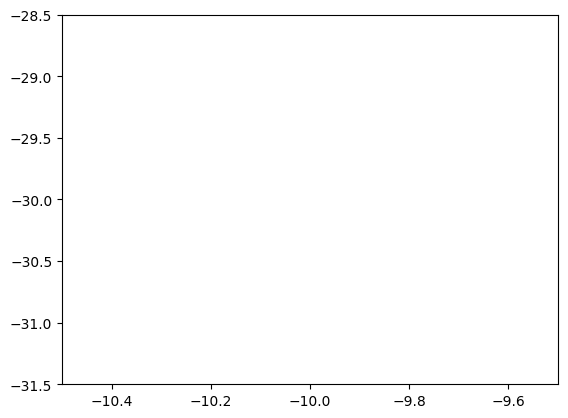

tensor(5.4380)


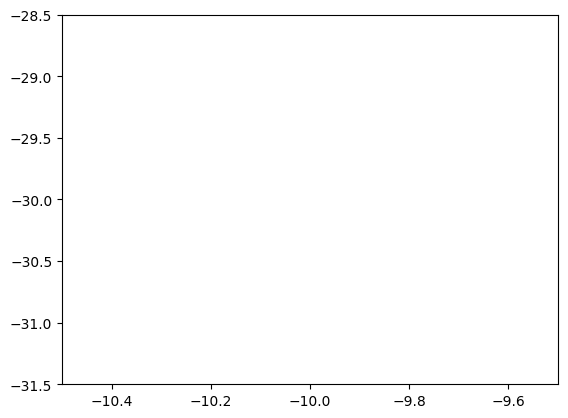

tensor(3.3894)


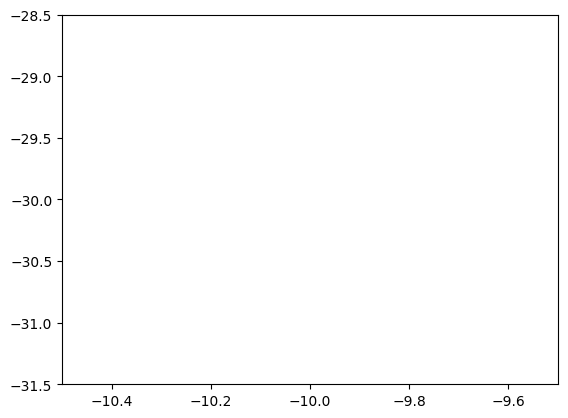

tensor(2.4721)


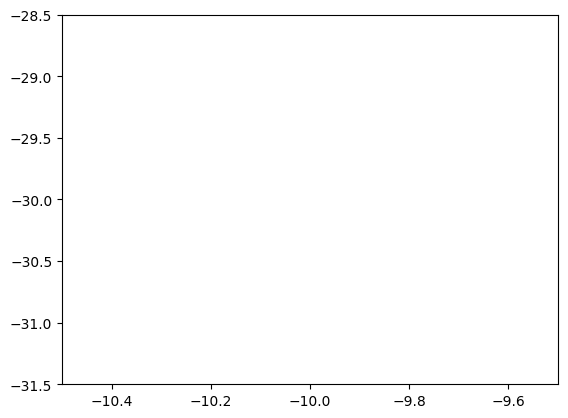

tensor(2.3555)


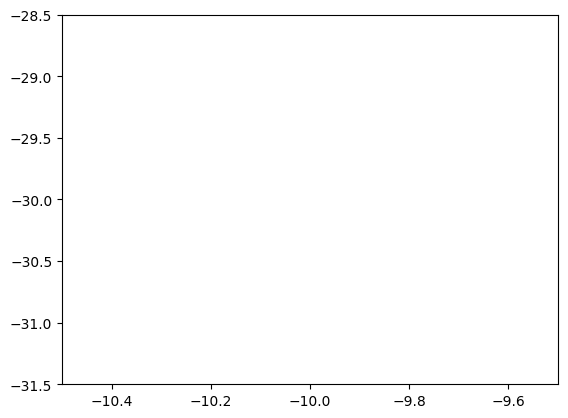

tensor(2.2550)


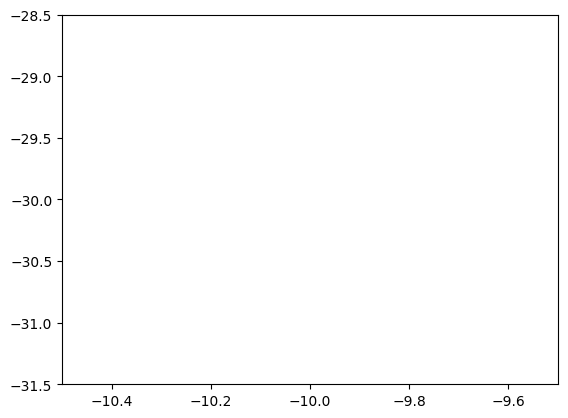

tensor(2.1546)


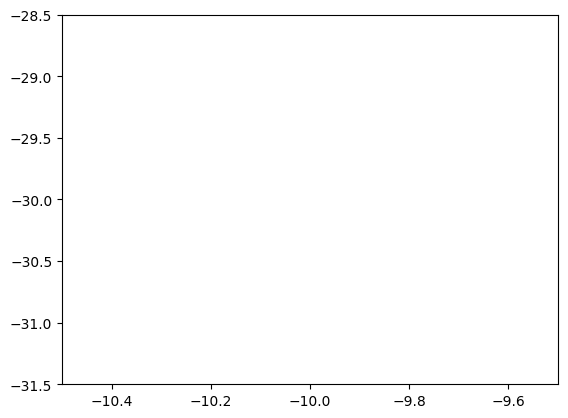

tensor(2.0543)


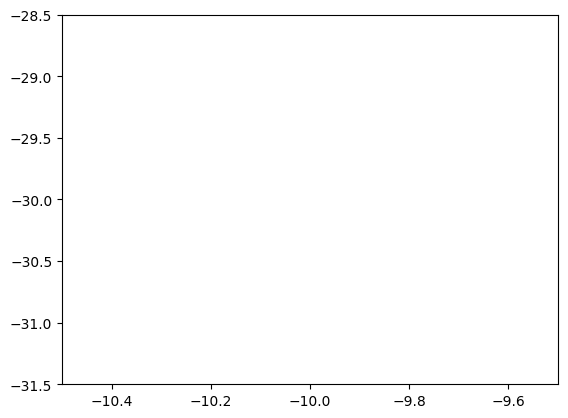

tensor(1.9539)


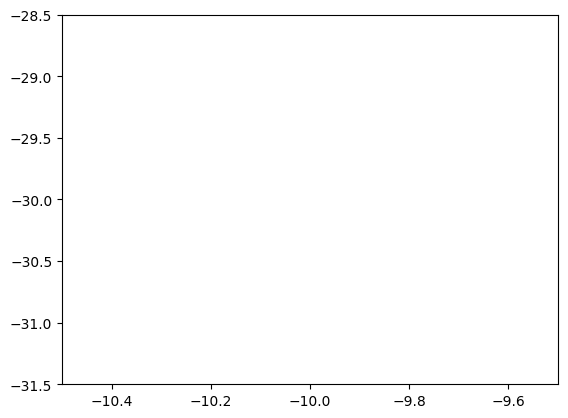

tensor(1.8536)


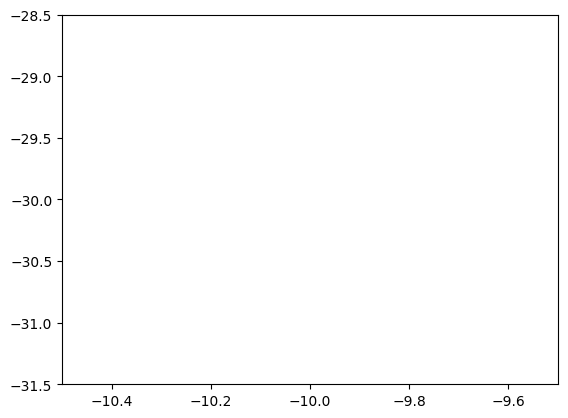

tensor(1.7534)


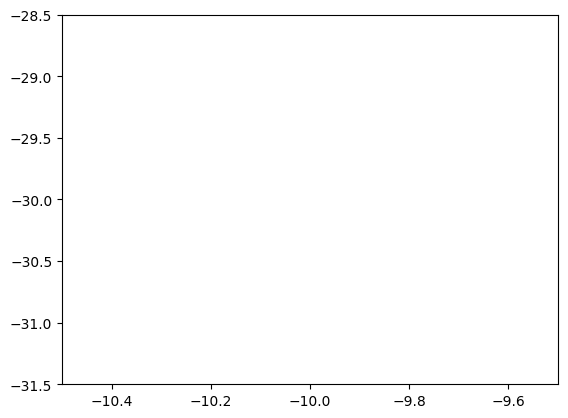

tensor(1.6531)


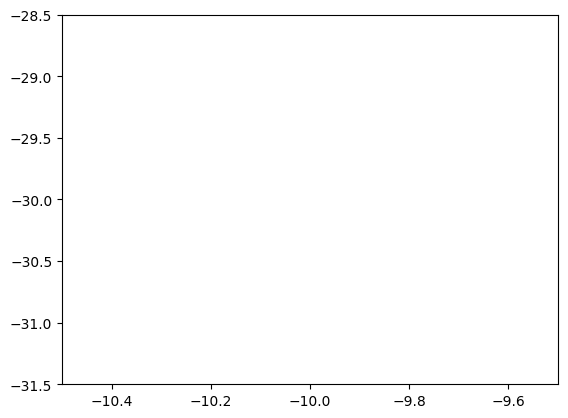

tensor(1.5528)


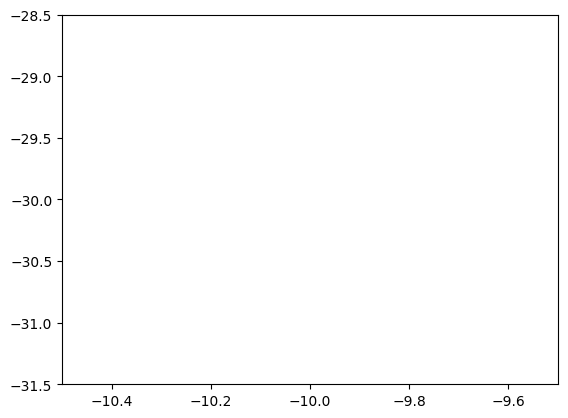

tensor(1.4525)


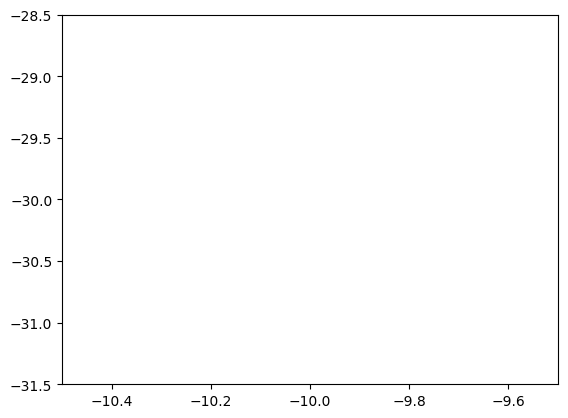

tensor(1.3522)


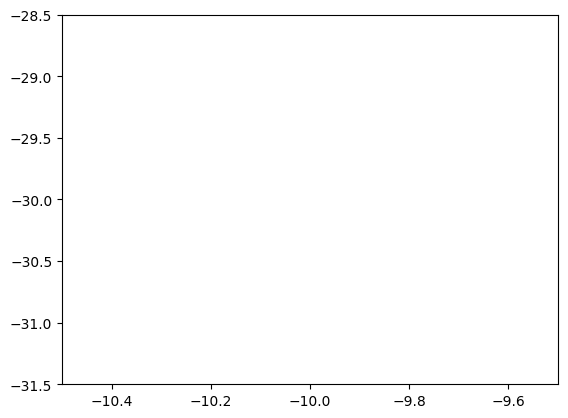

tensor(1.2519)


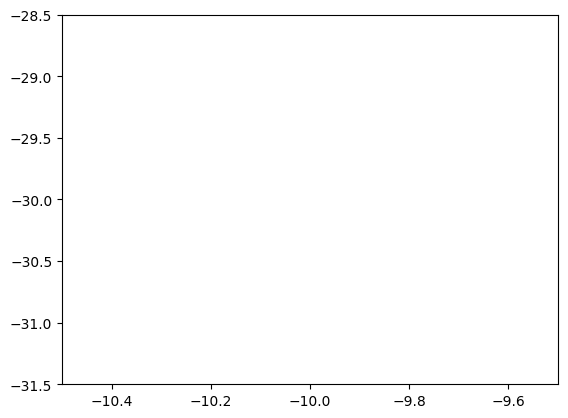

tensor(1.1517)


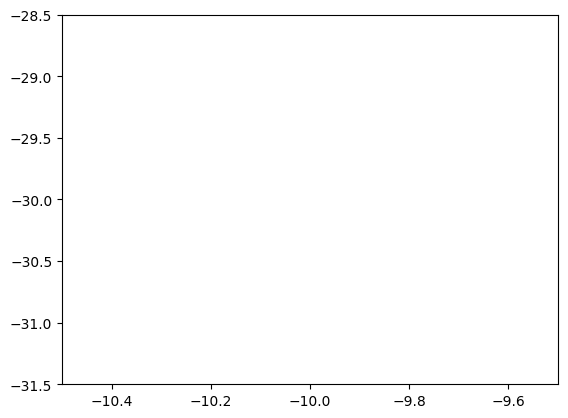

tensor(1.0514)


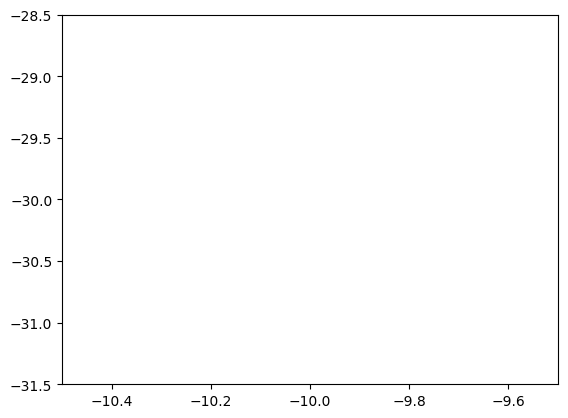

tensor(0.9512)


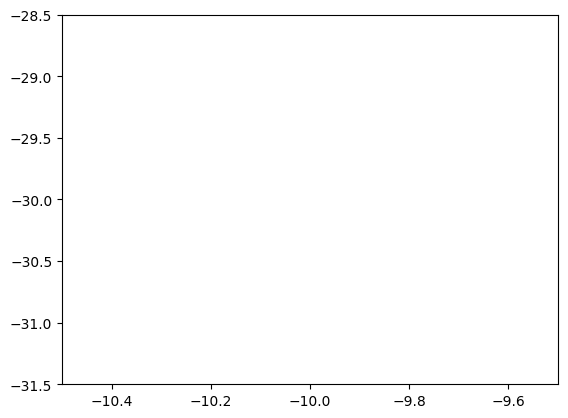

tensor(0.8509)


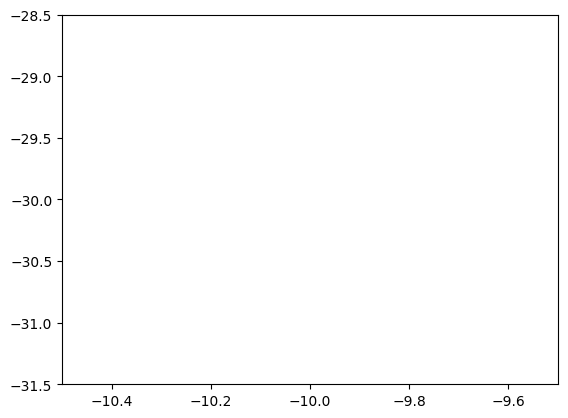

tensor(0.7507)


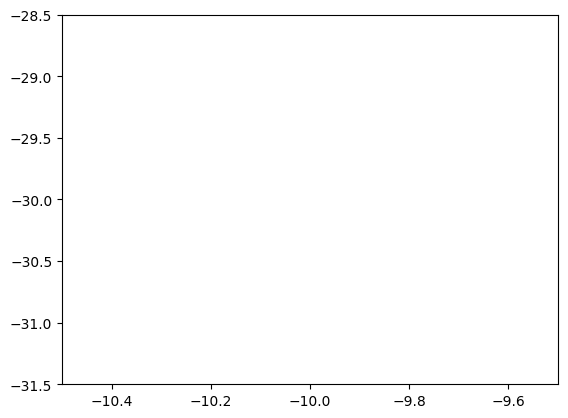

tensor(0.6506)


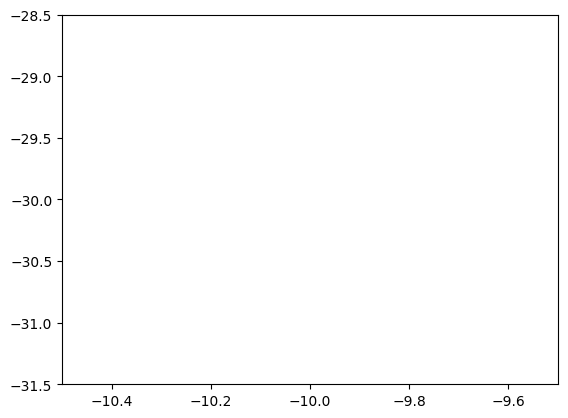

tensor(0.5505)


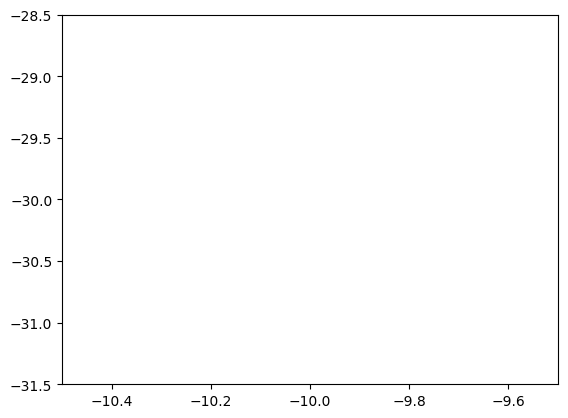

tensor(0.4526)


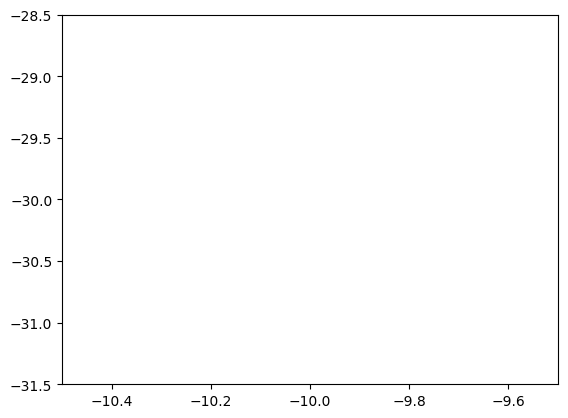

tensor(0.3603)


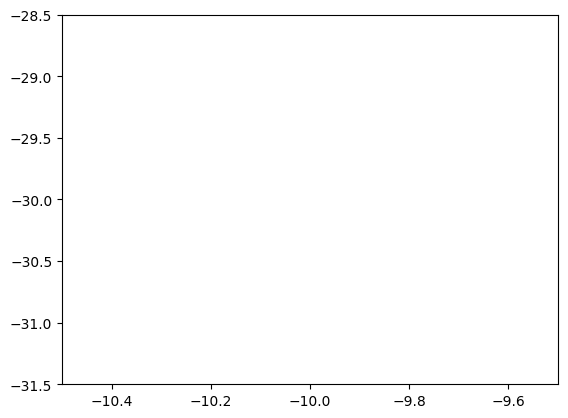

tensor(0.2799)


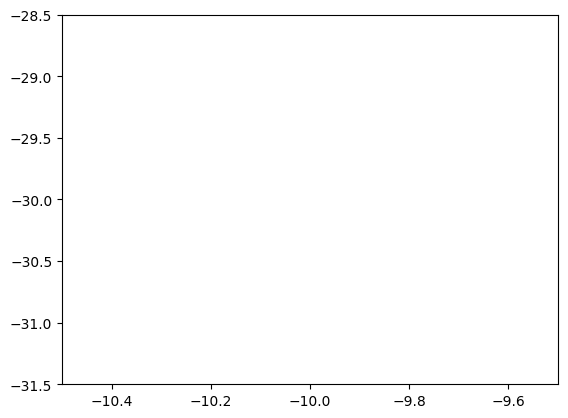

tensor(0.2241)


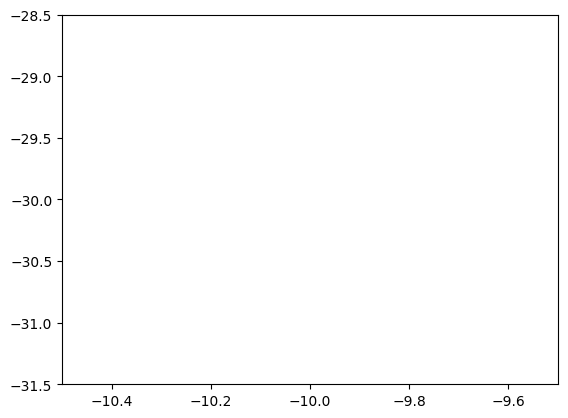

tensor(0.1913)


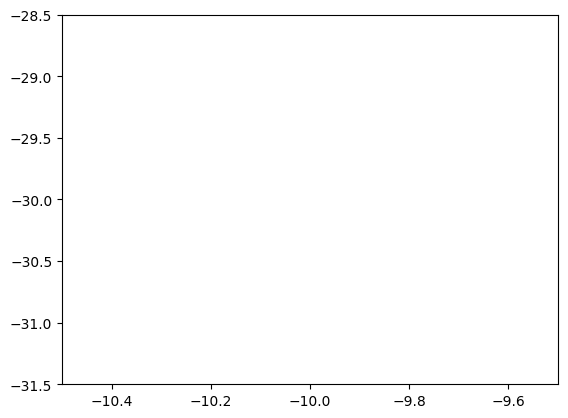

tensor(0.1747)


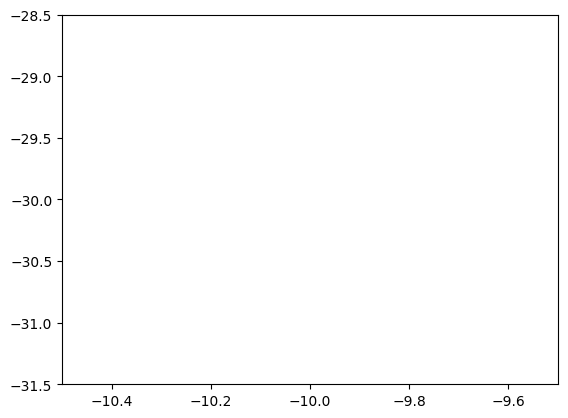

tensor(0.1666)


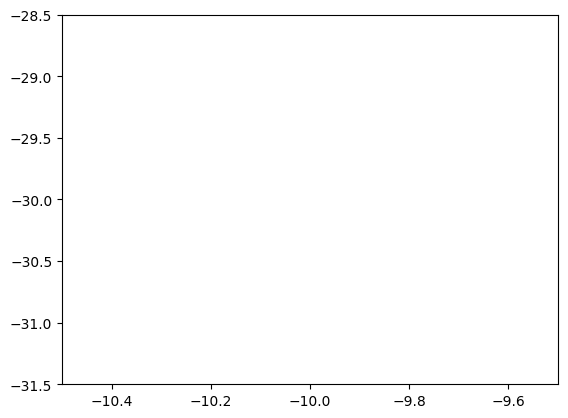

tensor(0.1629)


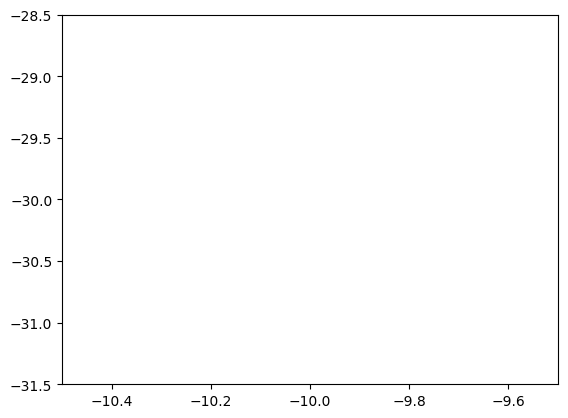

tensor(0.1617)


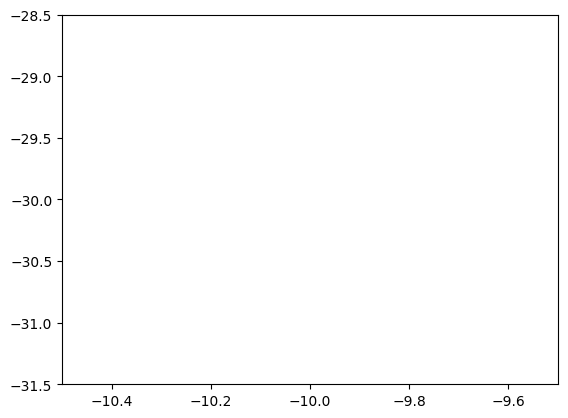

tensor(0.1611)


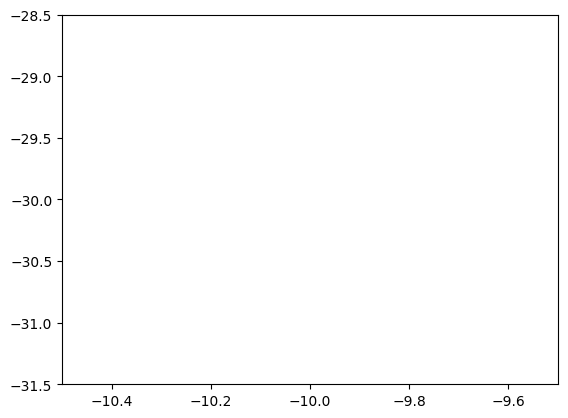

tensor(0.1609)


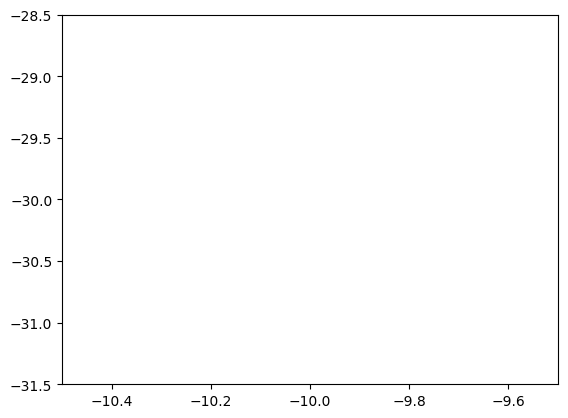

tensor(0.1608)


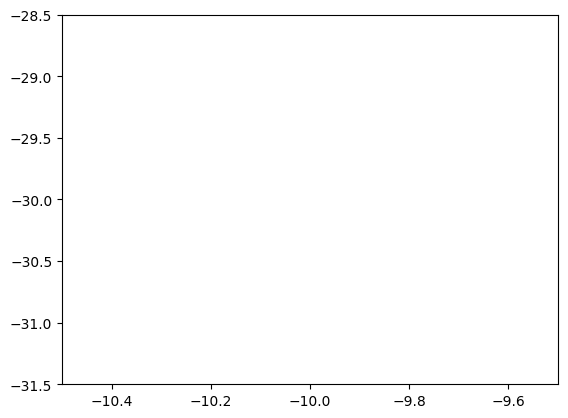

tensor(0.1607)


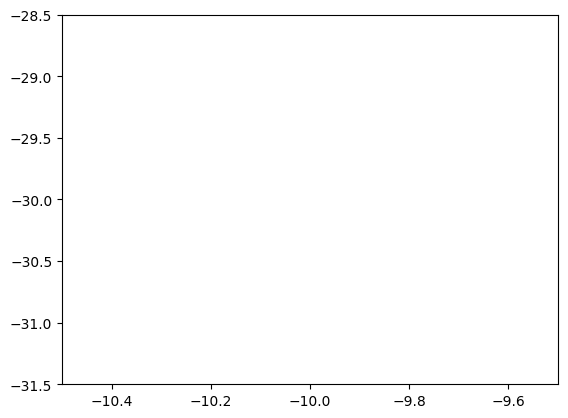

tensor(0.1607)


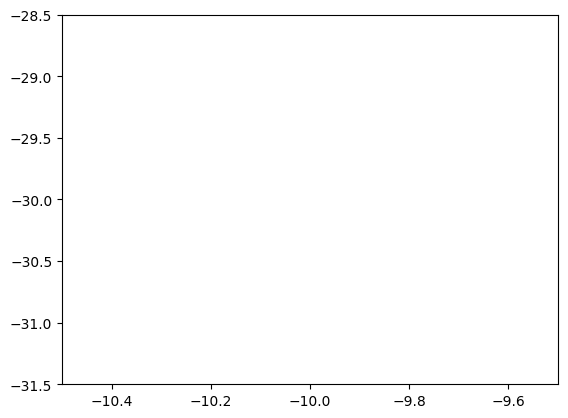

tensor(0.1606)


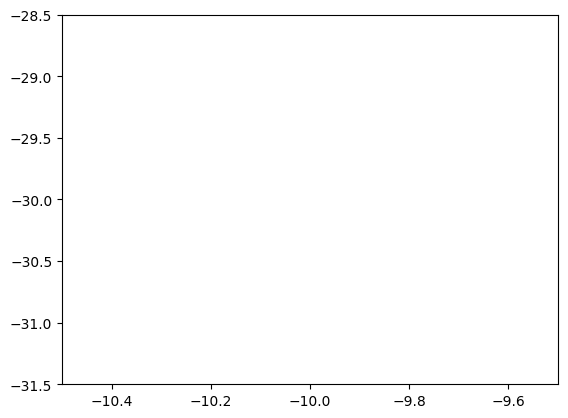

tensor(0.1606)


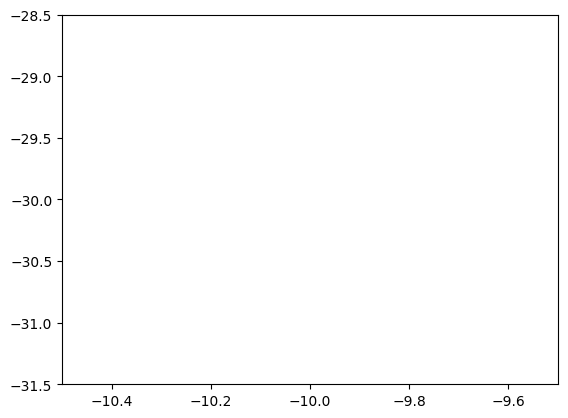

tensor(0.1606)


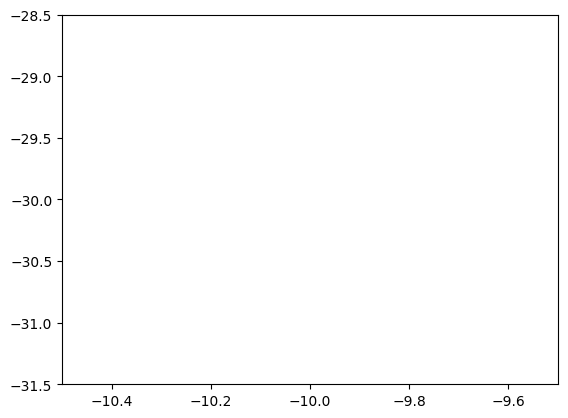

tensor(0.1606)


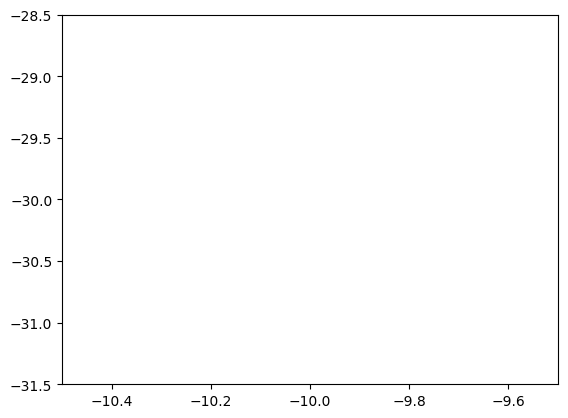

tensor(0.1606)


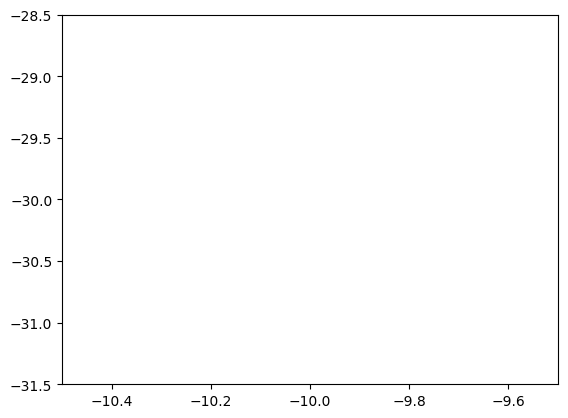

tensor(0.1606)


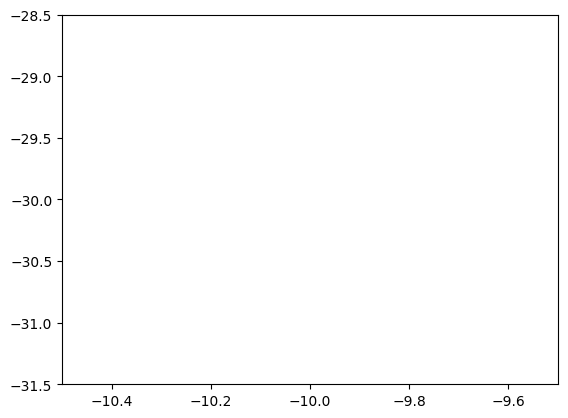

tensor(0.1606)


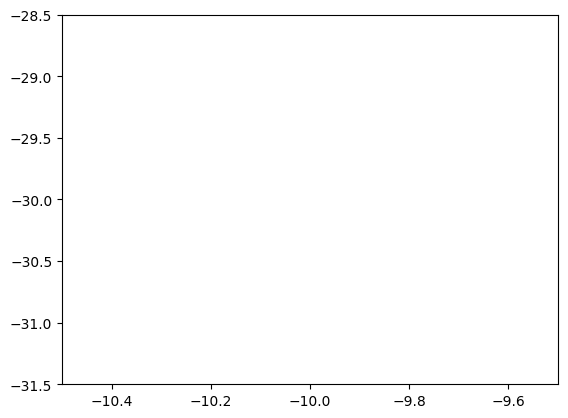

tensor(0.1606)


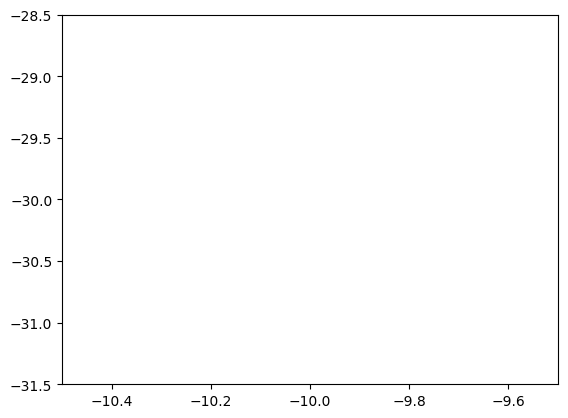

tensor(0.1606)


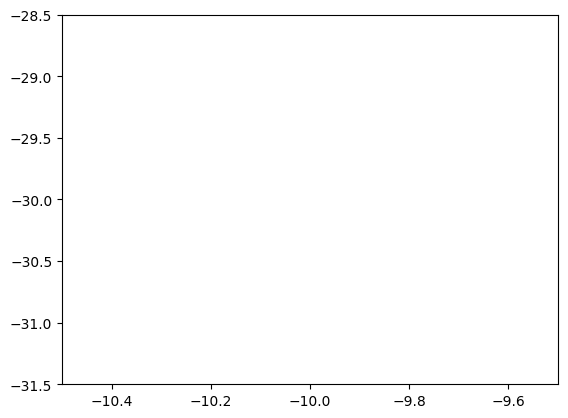

tensor(0.1606)


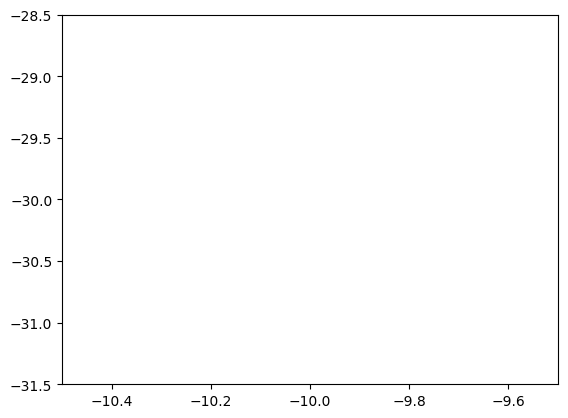

tensor(0.1606)


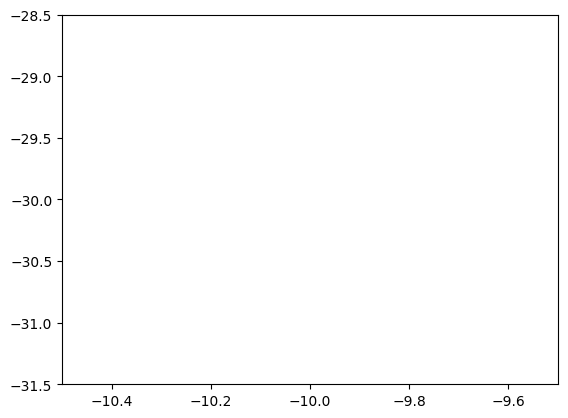

tensor(0.1606)


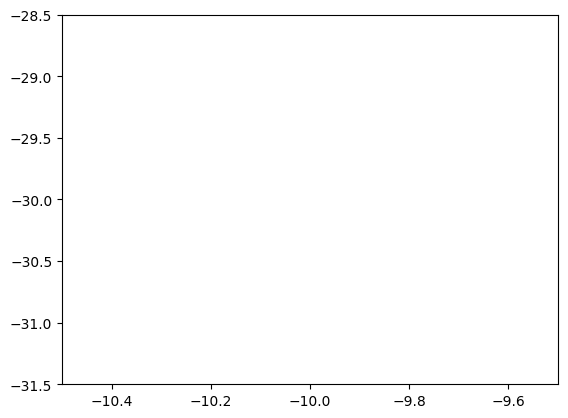

tensor(0.1606)


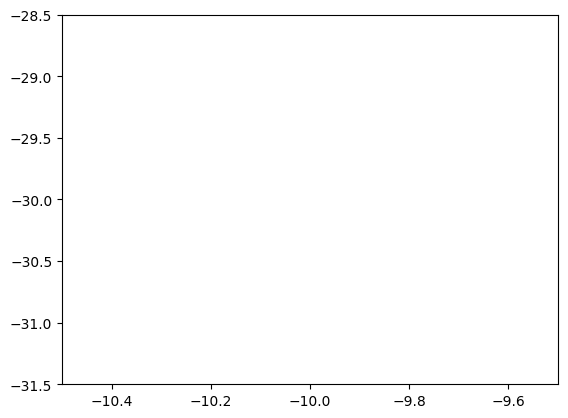

tensor(0.1606)


In [7]:
# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록
loss_arr = []

# 목표값은 y_noise로 지정
label = y_noise

# 500으로 지정했던 학습 횟수만큼 반복
for i in range(num_epoch):
  # 이전 학습의 기울기를 지우고, 최적화 함수 초기화
  # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않음.
  optimizer.zero_grad()

  # 입력값 x를 모델에 넣어 결과값을 얻는다.
  output = model(x)

  # 결과값과 목표값의 차이를 L1 손실 함수로 구해준다.
  loss = loss_func(output, label)

  # 손실에 대한 기울기를 구한다.
  loss.backward()

  # 구한 기울기를 이용해 모델의 변수를 업데이트
  optimizer.step()

  # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력.
  if i % 10 == 0:
    # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달
    plt.scatter(x.detach().numpy(), output.detach().numpy())
    plt.axis([-10, -10, -30, -30])
    plt.show()
    print(loss.data)

  # 손실을 loss_arr에 추가
  loss_arr.append(loss.detach().numpy())


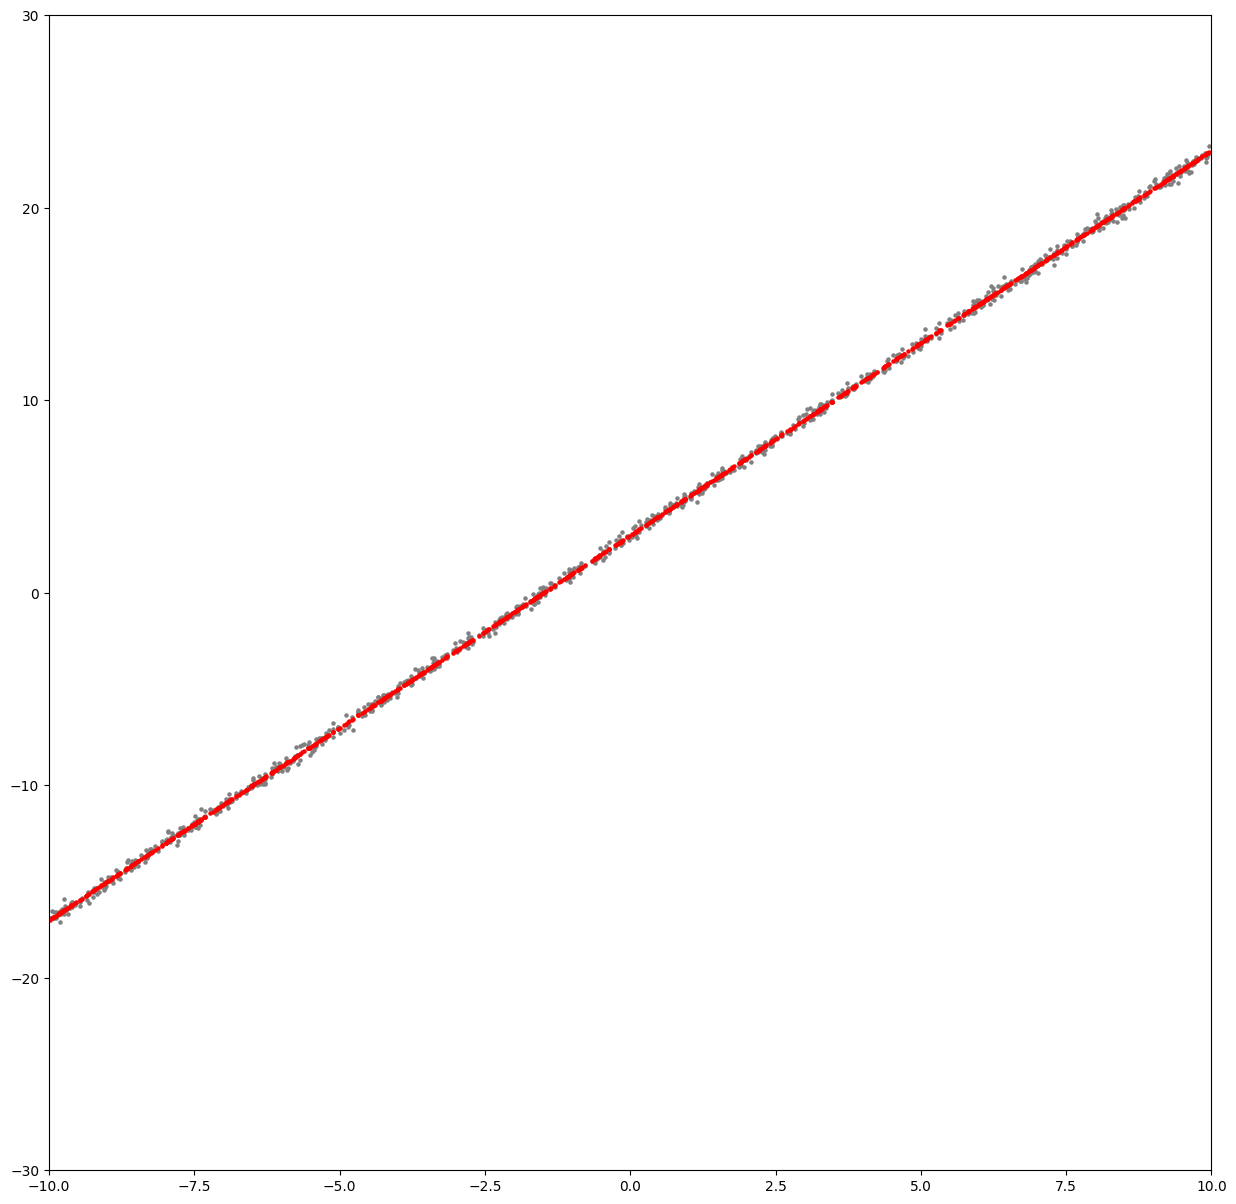

In [8]:
# 학습 후 데이터와 모델 결과값 확인
plt.figure(figsize=(15, 15))
plt.scatter(x.numpy(), y_noise.numpy(), s = 5, c = "gray")
plt.scatter(x.detach().numpy(), output.detach().numpy(), s = 5, c = "red")
plt.axis([-10, 10, -30, 30])
plt.show()

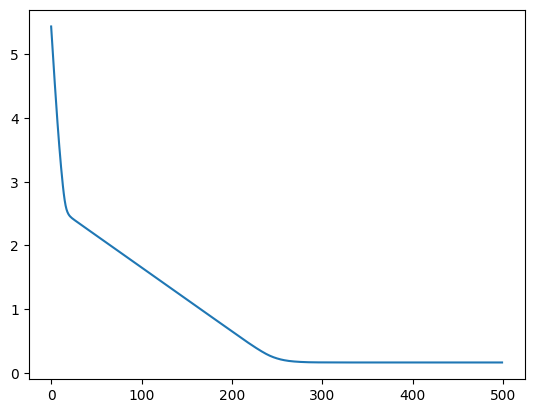

In [10]:
# 손실 그래프
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인
plt.plot(loss_arr)
plt.show()

In [11]:
# 학습 후 모델 변수 값 확인
# 현재 모델은 weight 와 bias를 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해본다.
param_list = list(model.parameters())
print("Weight: ", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight:  1.999598741531372 
Bias:  2.9899630546569824
